# Random Walk

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import random as rn
import numpy as np

## Diffusion through a crack
Simulate an unbiased random walk $Pr(H) = Pr(T) = 0.5$ with some obstacles.
- Put a reflection barrier at $x=–4$, i.e., the walk may land at –4 but may not stay there, and the next step must be to -3. Plot a sample path and a histogram.
-  Next, add a partial block at $x=6$, i.e., at $x=6$ there is only a 0.25 chance of going to 7 and a 0.75 chance of going to 5 (same for 7 to 6 ). Plot a histogram.

These are results that are hard to get in any way other than by simulation.

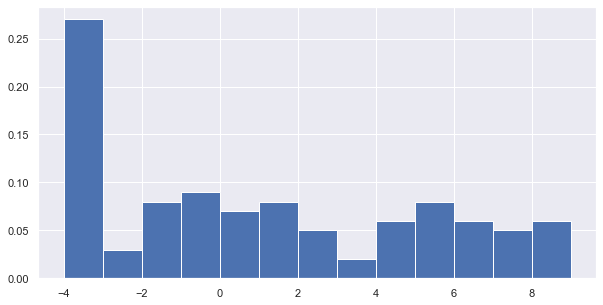

In [64]:
position, record = 0, []

for _ in range(100):
    if position == -4: x = -3
    else: position += rn.choice([-1, 1])
    record.append(position)

plt.figure(figsize=(10, 5))
plt.hist(record, bins=max(record)-min(record), density=True)
plt.show()

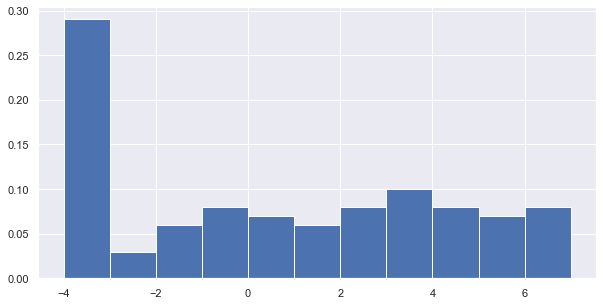

In [70]:
position, record = 0, []

for _ in range(100):
    if position == -4: x = -3
    elif position == 6:
        if rn.random() < .25: position = 7
        else: position = 5
    else: position += rn.choice([-1, 1])
        
    record.append(position)

plt.figure(figsize=(10, 5))
plt.hist(record, bins=max(record)-min(record), density=True)
plt.show()

## Wiener process / Brownian motion
- Simulate a random walk in the plane as follows.
    - Start at the origin.
    - From any given position, choose a direction from 0 to 360 degrees equally likely.
    - Next, choose a step size according to a Gaussian (normal) distribution with mean 0 and variance $\sigma^2$
    - Advance to that position and continue.

- Take $\sigma$ to be, variously, 0.5, 1, 2, the idea being to see what effect variance has on the 2 walk.
- Take the number of steps to be, variously, 20, 400, 1600, again to gauge the effect.
- Show a typical walk (i.e., a sample path) for one of the 1600 (or more) steps. Also, instead of histogramming, show a density plot, that is for several walkers, plot a point in the plane where the walker stops.

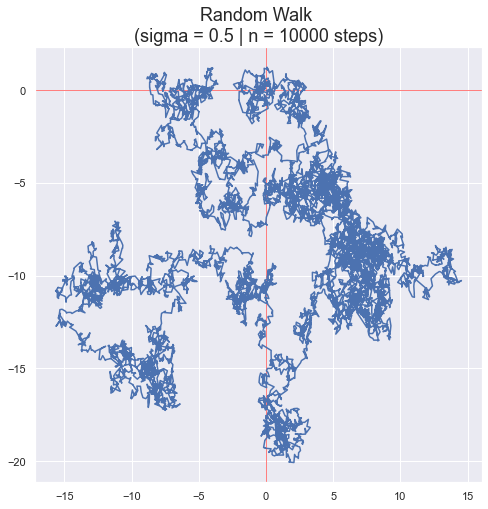

In [98]:
def random_walk(sigma, n_steps):
    x, y = np.zeros(n_steps), np.zeros(n_steps)
    for i in range(n_steps):
        angle = rn.choice(list(range(360)))
        step_size = np.random.normal(0, sigma**2)
        x[i], y[i] = x[i-1] + step_size * np.cos(angle), y[i-1] + step_size * np.sin(angle)
    
    plt.figure(figsize=(8, 8))
    plt.title("Random Walk \n(sigma = " + str(sigma) +\
              " | n = " + str(n_steps) + " steps)", fontsize=18)
    plt.axvline(0, color='red', linewidth=.5)
    plt.axhline(0, color='red', linewidth=.5)
    plt.plot(x, y)
    
random_walk(.5, 10**4)

In [99]:
def random_walk_dp(sigma, n_steps):
    x, y = np.zeros(n_steps), np.zeros(n_steps)
    for i in range(n_steps):
        angle = rn.choice(list(range(360)))
        step_size = np.random.normal(0, sigma**2)
        x[i], y[i] = x[i-1] + step_size * np.cos(angle), y[i-1] + step_size * np.sin(angle)
    return x[-1], y[-1]

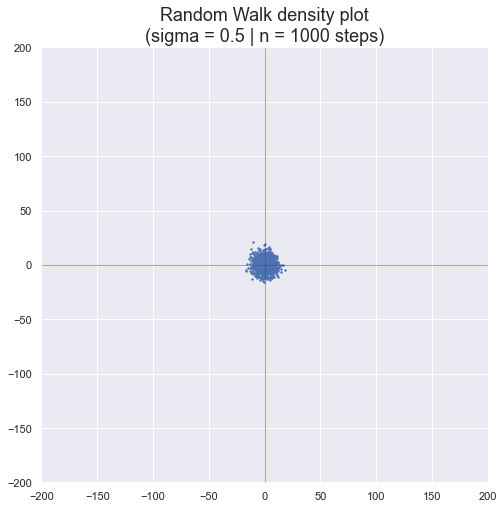

In [112]:
# For sigma = 0.5
sigma = 0.5
n_steps = 10**3
results = np.array([random_walk_dp(sigma, n_steps) for _ in range(10**3)]).T
plt.figure(figsize=(8, 8))
plt.title("Random Walk density plot\n(sigma = " + str(sigma) +\
          " | n = " + str(n_steps) + " steps)", fontsize=18)
plt.axvline(0, color='red', linewidth=.5)
plt.axhline(0, color='red', linewidth=.5)
plt.scatter(results[0], results[1], s=2)
plt.xlim(-200, 200); plt.ylim(-200, 200)
plt.show()

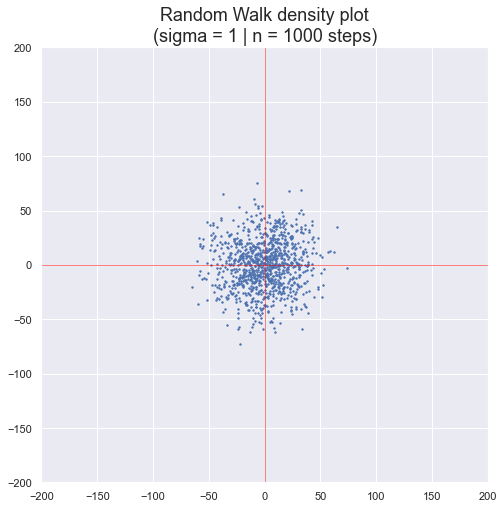

In [113]:
# For sigma = 1
sigma = 1
n_steps = 10**3
results = np.array([random_walk_dp(sigma, n_steps) for _ in range(10**3)]).T
plt.figure(figsize=(8, 8))
plt.title("Random Walk density plot\n(sigma = " + str(sigma) +\
          " | n = " + str(n_steps) + " steps)", fontsize=18)
plt.axvline(0, color='red', linewidth=.5)
plt.axhline(0, color='red', linewidth=.5)
plt.scatter(results[0], results[1], s=2)
plt.xlim(-200, 200); plt.ylim(-200, 200)
plt.show()

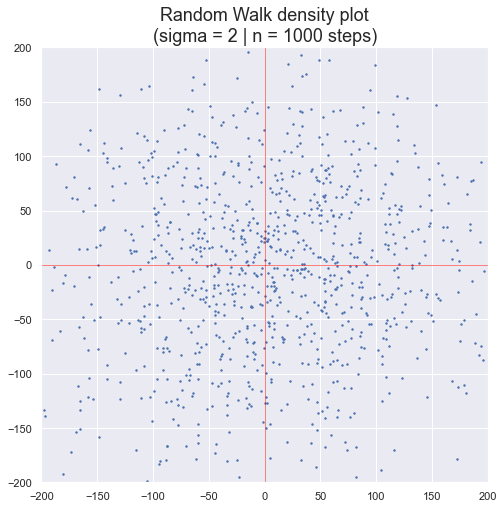

In [114]:
# For sigma = 2
sigma = 2
n_steps = 10**3
results = np.array([random_walk_dp(sigma, n_steps) for _ in range(10**3)]).T
plt.figure(figsize=(8, 8))
plt.title("Random Walk density plot\n(sigma = " + str(sigma) +\
          " | n = " + str(n_steps) + " steps)", fontsize=18)
plt.axvline(0, color='red', linewidth=.5)
plt.axhline(0, color='red', linewidth=.5)
plt.scatter(results[0], results[1], s=2)
plt.xlim(-200, 200); plt.ylim(-200, 200)
plt.show()

## Diffusion in the plane
Starting at the origin in the plane, carry out a random walk on the lattice of integer coordinate points over the square [–20, 20] × [–20, 20]. Assume that there is a square hole whose boundary is (13, 7), (14, 7), (14, 8), and (13, 8). Walks that reach this hole are absorbed, along with any walk which reaches the boundary. Show the distribution of final positions for walks of various steps and especially the fraction that enters the hole.

In [115]:
state = np.zeros(1600)
state = state.reshape(40, 40)
print(state)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [117]:
for i in range(len(state)):
    for j in range(len(state)):
        if (33 <= i <= 34) and (27 <= j <= 28):
            print('One')
            state[i][j] = -1
print(state)

One
One
One
One
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
